In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## step1 . 使用 pandas_datareader 得到 "AAPL" 這間公司股價的所有資料，不用設定資料時間

In [2]:
import pandas_datareader.data as web

In [4]:
a = web.DataReader("AAPL","yahoo")

## step2 . 取出最後300筆資料

In [5]:
A = a[len(a)-301:len(a)]

## step3 . 從這300筆資料，取出收盤價 close，並轉成 numpy_array 讓我們在後面使用

In [10]:
A_close = A["Close"]

In [12]:
x = A_close[0:300]
y = A_close[1:301]

## step4 . 現在我們要做的，是用前一天的收盤價，預測第二天的收盤價，請依照這個需求，把資料分成題目X (迴歸直線的x座標，表示所有的"前一天收盤價")，跟答案Y (迴歸直線的y座標，表示所有的"第二天的收盤價")

In [13]:
X = np.array(x)
Y = np.array(y)

In [14]:
X = X.reshape([300,1])
Y = Y.reshape([300,1])

## step5 . 請把題目X，答案Y再分成佔80%的訓練資料和20%的測試資料

In [15]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                   test_size=0.2,
                                                   random_state=50)

## step6 . 請實際利用訓練資料和scikit learn跑線性回歸，畫圖，並在得到的迴歸直線上，加上訓練資料的資料點，看看你回歸的結果和實際結果差多少。

In [19]:
from sklearn.linear_model import LinearRegression

In [22]:
lin = LinearRegression()

In [23]:
lin.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
Y_predict = lin.predict(X_test)

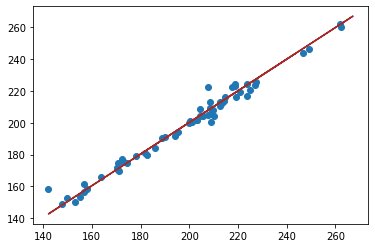

In [37]:
plt.scatter(Y_test,Y_predict)
plt.plot(X_train,lin.predict(X_train),'brown')